In [1]:
#imports
import pandas as pd #for the quick data analysis
import numpy as np #for the mathematical functions
import matplotlib.pyplot as plt #to create plots like the histogram 
from sklearn import model_selection #to split data into test sets
from sklearn.metrics import classification_report #for the performance evaluation of the  machine learning model
from sklearn.metrics import confusion_matrix #summarizes the performance of the classification model
from sklearn.metrics import accuracy_score #to calculate the accuracy of the classification model
from sklearn.linear_model import LogisticRegression #for the classification that uses logistic regression and to model binary outcomes
from sklearn.tree import DecisionTreeClassifier #to construct and train a decision tree model for classification
from sklearn.neighbors import KNeighborsClassifier #to train a KNN model for classification 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #to train a quadratic discriminant analysis model for classification
from sklearn.naive_bayes import GaussianNB #to construct and train a naive bayes model for classification 
from sklearn.svm import SVC #to train a support vector machine for classification 
import seaborn as sns


#Loading the different datasets
file_movies = pd.read_csv('movies.csv')
file_ratings = pd.read_csv('ratings.csv')

#to get a summary of the data

print(file_movies.info())
print(file_movies.describe())

print(file_ratings.info())
print(file_ratings.describe())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None
             movieId
count    9742.000000
mean    42200.353623
std     52160.494854
min         1.000000
25%      3248.250000
50%      7300.000000
75%     76232.000000
max    193609.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None
              userId        movieId         rating  

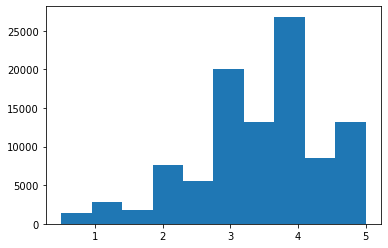

In [2]:
#Creating a Histogram using the ratings.csv and movies.csv file to get an idea of the distribution
#Putting together the two files
movies_ratings_histogram = pd.merge(file_movies, file_ratings, on="movieId")

data = movies_ratings_histogram["rating"]

#showing the histogram
plt.hist(data)
plt.show()

In [3]:
#I will start cleaning and formatting the data
#printing the first 10 rows of the files to see if i can spot any mistakes
print(file_movies.head(10))

print("=============================================================================================================")

print(file_ratings.head(10))

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   
5        6                         Heat (1995)   
6        7                      Sabrina (1995)   
7        8                 Tom and Huck (1995)   
8        9                 Sudden Death (1995)   
9       10                    GoldenEye (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
5                        Action|Crime|Thriller  
6                               Comedy|Romance  
7                           Adventure|Children  
8       

In [4]:
#because this is a large dataset i assume there will be some empty columns/missing values so i will check for that 
print(file_movies.isnull())
print(file_movies.isnull().mean())

print("=============================================================================================================")
print("=============================================================================================================")

print(file_ratings.isnull())
print(file_ratings.isnull().mean())

      movieId  title  genres
0       False  False   False
1       False  False   False
2       False  False   False
3       False  False   False
4       False  False   False
...       ...    ...     ...
9737    False  False   False
9738    False  False   False
9739    False  False   False
9740    False  False   False
9741    False  False   False

[9742 rows x 3 columns]
movieId    0.0
title      0.0
genres     0.0
dtype: float64
        userId  movieId  rating  timestamp
0        False    False   False      False
1        False    False   False      False
2        False    False   False      False
3        False    False   False      False
4        False    False   False      False
...        ...      ...     ...        ...
100831   False    False   False      False
100832   False    False   False      False
100833   False    False   False      False
100834   False    False   False      False
100835   False    False   False      False

[100836 rows x 4 columns]
userId       0.0
movieId

In [5]:
#to get an overview of the merged data frame
print("Merged Dataframe")
print(movies_ratings_histogram.head(10))


Merged Dataframe
   movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
5        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
6        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
7        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
8        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
9        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   userId  rating   timestamp  
0       1     4.0   964982703  
1       5     4.0   847434962  
2       7     4.5  1106635946  
3      

In [6]:
#in this dataset there might be the case that a movie has been rated by only1 person so i will check this out
movies_ratings_histogram.groupby('title')['rating'].count().sort_values(ascending=True).head(10)

title
'71 (2014)                                                                        1
Latter Days (2003)                                                                1
Late Shift, The (1996)                                                            1
Late Night with Conan O'Brien: The Best of Triumph the Insult Comic Dog (2004)    1
Late Night Shopping (2001)                                                        1
Late Marriage (Hatuna Meuheret) (2001)                                            1
Last of the Dogmen (1995)                                                         1
Last Year's Snow Was Falling (1983)                                               1
Last Winter, The (2006)                                                           1
Last Wedding, The (Kivenpyörittäjän kylä) (1995)                                  1
Name: rating, dtype: int64

In [7]:
#as we can see that is indeed the case
#i will group the rows of the merged dataframe by the title and then select the rating and then calculate the mean rating 
mean_rating= pd.DataFrame(movies_ratings_histogram.groupby('title')['rating'].mean())
mean_rating.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [8]:
#i will count the number of ratings
# i will create a new column  and give it the count number
mean_rating['rating_no']= pd.DataFrame(movies_ratings_histogram.groupby('title')['rating'].count())
mean_rating.head()


,rating,rating_no
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


In [9]:
#i will create a recommendation dataframe using the pivot_table function 
#the userId column will be the row labels and the title column will be the column label 
# the rating column will be used as the value parameter 
recommendation= movies_ratings_histogram.pivot_table(index='userId', columns='title',values='rating')
recommendation.head(10)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [10]:
#will try to find films similar to my favourite movie of all time fight club
fight_club = recommendation['Fight Club (1999)']

#we will calculate the correlation between the movies on our dataframe and fight club pd
fight_club_recc= recommendation.corrwith(fight_club)

#creating a new dataframe with a new correlation column 
fightclub_correlation = pd.DataFrame(fight_club_recc,columns=['Correlation'])

#from the table above we can see a lot of NaN values so i will drop them

# Droping the nan values 
fightclub_correlation.dropna(inplace=True)

#as we have seen above some movies have only been rated once so to ensure i dont get any inaccurate predictions i will only 
#keep movies that have been rated atleast 50 times
fightclub_correlation= fightclub_correlation.join(mean_rating['rating_no'])
fightclub_correlation[fightclub_correlation['rating_no']>50].sort_values(by='Correlation',ascending=False).head()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,rating_no
title,,
Fight Club (1999),1.000000,218
"Lock, Stock & Two Smoking Barrels (1998)",0.734390,67
"Wolf of Wall Street, The (2013)",0.718489,54
Legends of the Fall (1994),0.677384,68
Django Unchained (2012),0.635760,71


In [11]:
def get_correlated_movies(title):
  
  movie_ratings = recommendation[title]

  
  movie_recc = recommendation.corrwith(movie_ratings)

  
  movie_correlation = pd.DataFrame(movie_recc, columns=['Correlation'])

  
  movie_correlation.dropna(inplace=True)

  
  movie_correlation = movie_correlation.join(mean_rating['rating_no'])
  return movie_correlation[movie_correlation['rating_no'] > 50].sort_values(by='Correlation', ascending=False)

correlated_movies = get_correlated_movies('Taxi Driver (1976)')

print(correlated_movies.head())

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


                               Correlation  rating_no
title                                                
Taxi Driver (1976)                1.000000        104
Vertigo (1958)                    0.744485         60
Dark Knight Rises, The (2012)     0.727365         76
True Romance (1993)               0.689937         65
Brazil (1985)                     0.675279         59


In [12]:
corr_movies = get_correlated_movies('Heat (1995)')
print(corr_movies.head())

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


                                                    Correlation  rating_no
title                                                                     
Heat (1995)                                            1.000000        102
Philadelphia (1993)                                    0.686060         66
Slumdog Millionaire (2008)                             0.662325         71
Léon: The Professional (a.k.a. The Professional...     0.651800        133
Bourne Ultimatum, The (2007)                           0.611546         81
